+ Alias    Description
+ B        business day frequency
+ C        custom business day frequency
+ D        calendar day frequency
+ W        weekly frequency
+ M        month end frequency
+ SM       semi-month end frequency (15th and end of month)
+ BM       business month end frequency
+ CBM      custom business month end frequency
+ MS       month start frequency
+ SMS      semi-month start frequency (1st and 15th)
+ BMS      business month start frequency
+ CBMS     custom business month start frequency
+ Q        quarter end frequency
+ BQ       business quarter end frequency
+ QS       quarter start frequency
+ BQS      business quarter start frequency
+ A, Y     year end frequency
+ BA, BY   business year end frequency
+ AS, YS   year start frequency
+ BAS, BYS business year start frequency
+ BH       business hour frequency
+ H        hourly frequency
+ T, min   minutely frequency
+ S        secondly frequency
+ L, ms    milliseconds
+ U, us    microseconds
+ N        nanoseconds

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/harik/python pratice/00 - datasets-20251216T065029Z-1-001/00 - datasets/airline_passengers.csv",index_col='Month',parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [3]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [5]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

### Visualize the data

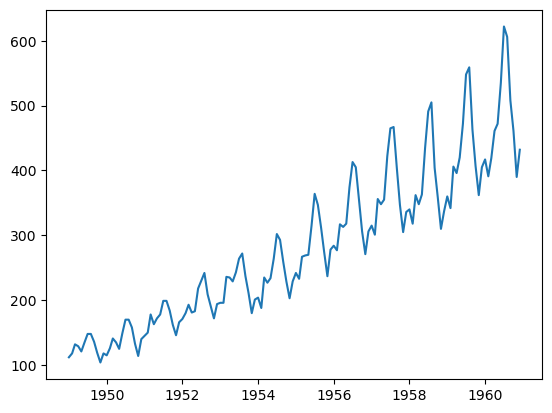

In [6]:
plt.plot(df)
plt.show()

### ETS Decomposition

In [7]:
from statsmodels.tsa.seasonal import STL

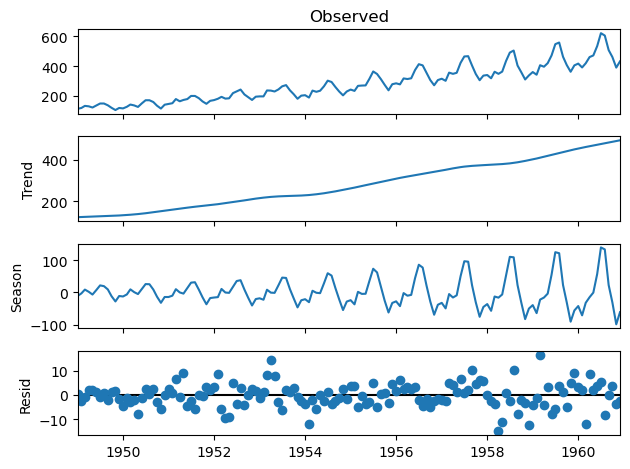

In [8]:
res = STL(df).fit()
res.plot()
plt.show()

#### Augmented Dickey Fuller Test (ADF Test for stationarity)

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(data):
    if adfuller(data)[1] > 0.05:
        print('Data is not Stationary')
    else:
        print('Data is stationary')

In [11]:
adfuller(df)

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [12]:
adf_test(df)

Data is not Stationary


###### Try manual differencing

In [13]:
from statsmodels.tsa.statespace.tools import diff

In [14]:
diff_2 = diff(df, k_diff=2)

In [15]:
adf_test(diff_2)

Data is stationary


#### How many lag terms to include in the model?

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\harik\AppData\Local\Temp\ipykernel_21180\168927529.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


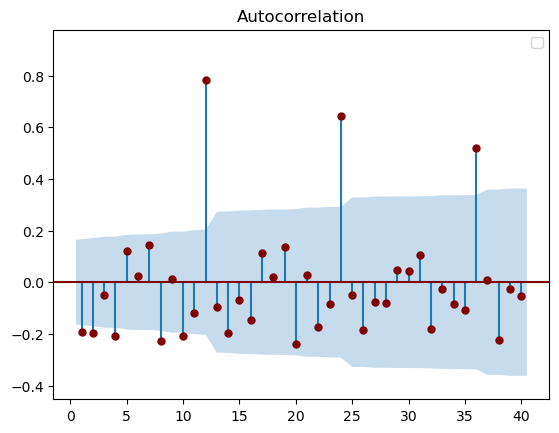

In [17]:
plot_acf(diff_2, lags=40, zero=False, 
         color="maroon",
         title='Autocorrelation',
         auto_ylims=True,
        )
plt.legend()
plt.show()

C:\Users\harik\AppData\Local\Temp\ipykernel_21180\2821124442.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


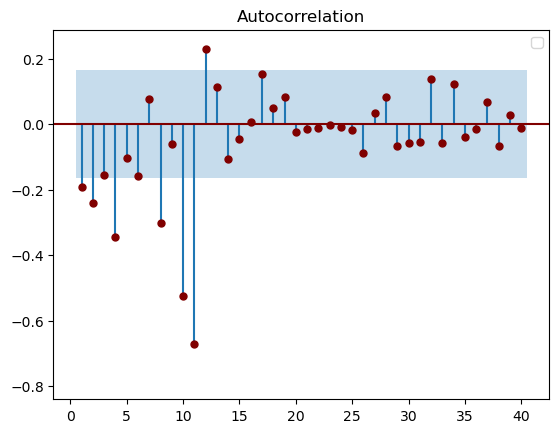

In [18]:
plot_pacf(diff_2, lags=40, zero=False, 
         color="maroon",
         title='Autocorrelation',
         auto_ylims=True,
        )
plt.legend()
plt.show()

#### Build the appropriate model

In [19]:
#!pip install pmdarima

In [20]:
#from pmdarima import auto_arima
#from pmdarima.model_selection import train_test_split

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Step 6: Fit AR Model
# (p=1, d=0, q=0) -> AR(1) model

ar_model = ARIMA(df['Thousands of Passengers'], order=(1,0,0))
ar_model_fit = ar_model.fit()

# Summary of AR model
ar_summary = ar_model_fit.summary()
#ar_summary

In [22]:
print("AIC: ",ar_model_fit.aic)
print("BIC: ",ar_model_fit.bic)

# Calculate RMSE using the fitted values and original data
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(df['Thousands of Passengers'], ar_model_fit.fittedvalues))
print("RMSE:",rmse)

AIC:  1428.1805312555039
BIC:  1437.0899711542318
RMSE: 36.0781778828505


In [23]:
ma_model = ARIMA(df['Thousands of Passengers'], order=(0,0,1))
ma_model_fit = ma_model.fit()

# Summary of MA model
ma_summary = ma_model_fit.summary()


C:\Users\harik\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [24]:
#✅ MA Model (ARIMA(0,0,1)) Fitting Summary:

print("AIC: ",ma_model_fit.aic)
print("BIC: ",ma_model_fit.bic)

# Calculate RMSE using the fitted values and original data
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(df['Thousands of Passengers'], ma_model_fit.fittedvalues))
print("RMSE:",rmse)

AIC:  1618.8625271359383
BIC:  1627.7719670346662
RMSE: 66.19940670254935


In [25]:
# Step 8: Fit ARIMA Model
# (p=1, d=1, q=1) -> ARIMA(1,1,1) model

arima_model = ARIMA(df['Thousands of Passengers'], order=(1,1,1))
arima_model_fit = arima_model.fit()

# Summary of ARIMA model
arima_summary = arima_model_fit.summary()

In [26]:
print("AIC: ",arima_model_fit.aic)
print("BIC: ",arima_model_fit.bic)

# Calculate RMSE using the fitted values and original data
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(df['Thousands of Passengers'], arima_model_fit.fittedvalues))
print("RMSE:",rmse)

AIC:  1394.6825053251669
BIC:  1403.5710392159465
RMSE: 32.29443390593626
